# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

### <font color="blue">Kiran Korey </font>

# I. Overview

The objective of this assignment is to implement deep neural networks with hidden layers containing various numbers of hidden nodes to build classification models. This was accomplished using the TensorFlow library and was tested on mushroom classification data set. Four deep neural network models where implemented, the aim of all of which will be to study how the contracting and expanding nature of hidden layers will affect the results of model. The code, explanation and the results and it's visualization can be seen below.

# II. Data

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as ** edible, poisonous**.

The attribute Information is as follows: **(classes: edible=e, poisonous=p) **

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Source of the Data 
The data is taken from : https://www.kaggle.com/uciml/mushroom-classification/data

### Reading the Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
import tensorflow as tf
import itertools

# Reading data 
df = pd.read_csv("mushrooms.csv",header=0);
df.head()

C:\Users\kiran\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


### Preprocessing of the Data

Let us preprocess the data and separate the Output class from the data frame.

Lets start with checking for Null values.

In [2]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**There are no null values!!**

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


Clearly the data has a lot of categorical data, let's convert them to inters using LabelEncoder.

In [4]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
for f in range(22):
    df.iloc[:,f] = lbl.fit_transform(df.iloc[:,f])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Let's check if there are any missing values.

In [5]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Lets see how the output data is placed with respect to any one feature.
consider **stalk-color-above-ring** as the feature.

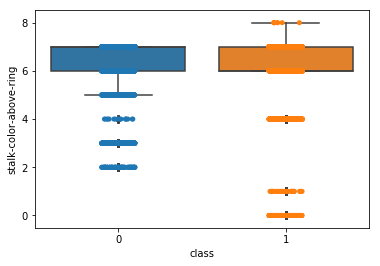

In [7]:
import seaborn as sns
ax = sns.boxplot(x='class', y='stalk-color-above-ring', 
                data=df)
ax = sns.stripplot(x="class", y='stalk-color-above-ring',
                   data=df, jitter=True,
                   edgecolor="gray")

Looks like the **data is well placed**, Lets plot with one other feature to be double sure.

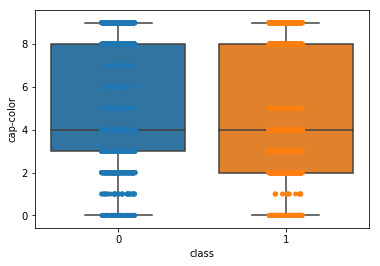

In [8]:
ax = sns.boxplot(x='class', y='cap-color', 
                data=df)
ax = sns.stripplot(x="class", y='cap-color',
                   data=df, jitter=True,
                   edgecolor="gray")

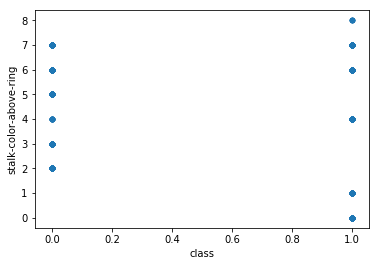

In [9]:
df.plot(kind='scatter', x='class', y='stalk-color-above-ring')

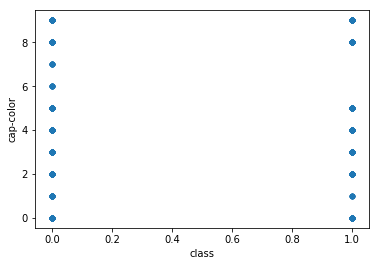

In [10]:
df.plot(kind='scatter', x='class', y='cap-color')

Okay, thats Good.

Let's partition the data now and separate the output class. 

In [11]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[1 :]], df.loc[:,'class'], test_size=0.2,train_size=0.8)
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6771,2,3,2,0,2,1,0,1,0,1,...,1,1,6,7,2,1,0,7,4,2
7442,3,2,4,0,7,1,0,1,0,1,...,2,2,7,7,2,1,0,7,4,0
6995,2,3,2,0,7,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,0
559,5,3,9,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,3,2,3
5100,5,0,9,0,2,1,0,0,7,0,...,1,1,6,6,2,1,2,1,4,1


# III. Methods

### Experimental Code

The following experimental code makes 2 nodes that each hold a float constant. In the session below that, the two nodes are added together into a new node in an operation that is run even further down the line. This combination is a small scale representation of the types of operations that occur in a deep neural network.


In [12]:
import tensorflow as tf

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0)

with tf.Session() as sess:
    op_add = tf.add(node1, node2)
    print(op_add)
    print(sess.run(op_add))

Tensor("Add:0", shape=(), dtype=float32)
7.0


Before we start implementing the deep neural network, we need to change the class column to indicator matrix,below is the code to do the same.

In [13]:
def toIndicatorMatrix(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    T = np.zeros((n_labels, n_unique_labels))
    T[np.arange(n_labels), labels] = 1
    return T

Let's use this method to change Y_train and Y_test to indicator matrix

In [14]:
T_train= toIndicatorMatrix(Y_train)
T_test= toIndicatorMatrix(Y_test)
print(T_train.shape)
print(T_test.shape)
print(T_train)

(6499, 2)
(1625, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


### The Summary of neural network :

I have implemented 3 feed forward deep neural network with 6 hidden layers each.
The main reason behind these networks is i wanted to examine the how the data behaves to contracting models and expanding models. 
- __Contract-Expand:__ 
    The number of nodes in hidden layer in this network is like this 20 --> 15 --> 10 --> 10 --> 15 --> 20.
    It starts from approximately the same number of nodes as input features and then decreases by 5 at each hidden layer till a certain value which is 10 in this case and again starts expanding by 5 till it reaches the same number of nodes as in the first hidden layer.
- __Alternating:__
    The number of nodes in hidden layer in this network is like this 20 --> 5 --> 20 --> 5 --> 20 --> 5.
    It starts from approximately the same number of nodes as input features and then decreases to one-fourth i.e. 5 and keeps alternating between these two numbers until 6 hidden layers.
- __Contracting:__
    The number of nodes in hidden layer in this network is like this 60 --> 50 --> 40 --> 30 --> 20 --> 10.
    It starts from approximately 3 times the number of nodes as input features and then decreases by 10 at each hidden layer until six hidden layers, which clearly shows the contracting nature of the network.
- __Expanding:__
    The number of nodes in hidden layer in this network is like this 10 --> 20 --> 30 --> 40 --> 50 --> 60.
    It starts from approximately half the number of nodes as input features and then increases by 10 at each hidden layer until six hidden layers, which clearly shows the Expanding nature of the network.

### 1. Contract-Expand Deep Neural Network

There are approximately 20 inputted features (all of which are standardized on a scale of 0-1 per respective feature). This deep neural network is a feed forward network that contracts the number of nodes per hidden layer and then expands back to the  number of inputs. So, the number of nodes per hidden layer went as follows: 20 --> 15 --> 10 --> 10 --> 15 --> 20. This structure was chosen because there are many features and wanted to see how the model exploits these features when it is contracted and again brought back to normal.

The code below the learning rate is set to 0.05 for consistency through each of the 3 networks, and the number of epochs is limited to 200. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set. 

In [15]:
learning_rate = 0.05
training_epochs = 200 #200
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1] 
n_class = 2 

#define the number of nodes for each hidden layer
n_hidden_1 = 20
n_hidden_2 = 15
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 15
n_hidden_6 = 20

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class])) 
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

#define weight for each hidden layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

#define biases for each hidden layer
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class])) 
}
#initialize all the variables and layers
init = tf.global_variables_initializer()
saver = tf.train.Saver()

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)


layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function) 

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []
#run for accuracy and mse
for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost) #Appends cost
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



MSE history


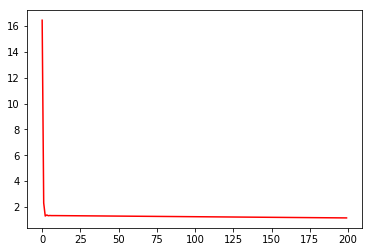

Accuracy over epochs


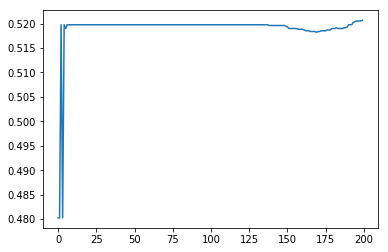

Test accuracy:  0.51015383
MSE: 1.1547


In [16]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE: %.4f" % sess.run(mse))

sess.close()

The results above show that this structure was not so effective in classifying the mushrooms.
Over the epochs, the MSE increased for the first 10 to 15 epochs after that it decreased almost linearly till the very last epoch(It might have further decreased if I had run for few more epochs). The accuracy on the training set also decreased for the first 2 or 3 epochs and then increased linearly with slight fluctuations at around 150 to 175 epochs after which it became constant at 175 and further epochs.

The test accuracy of this model is just around **51.81%** and MSE of **2.95** clearly shows that this model was not accurate and might have overfitted the data.

### 2. Alternating Deep Neural Network


Like the first model (Contract-Expand Deep Neural Network) this deep neural network is also feed forward network but this model alternates with the number of nodes in each hidden layer. So, The number of nodes in hidden layer in this network is like this 20 --> 5 --> 20 --> 5 --> 20 --> 5. This structure was chosen because there are many features and wanted to see how the model exploits these features when it is contracted and expanded repeatedly.

The code below is the same as in the previous model. The only difference is in the number of nodes per hidden layer.
In the code below the learning rate is set to 0.05 for consistency through each of the 4 networks, and the number of epochs is limited to 200. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set. 

In [17]:
learning_rate = 0.05
training_epochs = 200
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1]
n_class = 2 

n_hidden_1 = 20
n_hidden_2 = 5
n_hidden_3 = 20
n_hidden_4 = 5
n_hidden_5 = 20
n_hidden_6 = 5

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)

layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)

MSE history


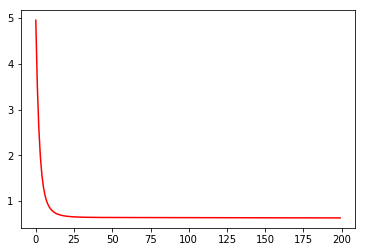

Accuracy over epochs


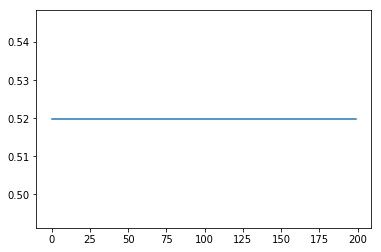

Test accuracy:  0.51076925
MSE: 0.6277


In [18]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE: %.4f" % sess.run(mse))

sess.close()

The results above show that this structure was also not so effective in classifying the mushrooms.
Over the epochs, the MSE decreased rapidly for the first 2 epochs after that it decreased linearly till the very last epoch(It might have further decreased if I had run for few more epochs).Whereas the accuracy on the training set is a little interesting here,it increases to around 5.18% in the 2nd epoch and remains constant till the very last epoch.

The test accuracy of this model is just around **51.81%** and MSE of **12.80** clearly shows that this model was also not accurate and might have overfitted the data.

### 3.Contracting Deep Neural Network

This deep neural network is also feed forward network but this model decreases with the number of nodes in each hidden layer which acts like contracting network. So, The number of nodes in hidden layer in this network is like this 60 --> 50 --> 40 --> 30 --> 20 --> 10. This structure was chosen because there are many features and wanted to see how the model exploits these features when it is contracted and expanded repeatedly.

The code below is the same as in the previous model. The only difference is in the number of nodes per hidden layer.
In the code below the learning rate is set to 0.05 for consistency through each of the 4 networks, and the number of epochs is limited to 200. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set. 

In [19]:
learning_rate = 0.05
training_epochs = 200 #200
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1] 
n_class = 2

n_hidden_1 = 60 
n_hidden_2 = 50
n_hidden_3 = 40
n_hidden_4 = 30
n_hidden_5 = 20
n_hidden_6 = 10

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)

layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)

MSE history


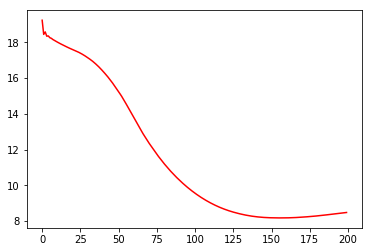

Accuracy over epochs


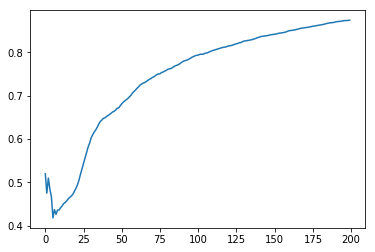

Test accuracy:  0.8713846
MSE: 8.4805


In [20]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE: %.4f" % sess.run(mse))

sess.close()

The results above show that this structure was slightly better in classifying the mushrooms than the previous two models.
Over the epochs, the MSE fluctuates for the first few (25) epochs after that it decreased linearly till the very last epoch(It might have further decreased if I had run for few more epochs).Whereas the accuracy on the training set also fluctuates till 25 epochs in an increasing manner and then decreases steadily till 75th epoch and steadily increases to 70%  till 150th epoch and  remains constant till the very last epoch.

The test accuracy of this model is around **70%** and MSE of **9.52** clearly shows that this model has not over fitted the data.

### 4. Expanding Deep Neural Network

This deep neural network is also feed forward network but this model increases with the number of nodes in each hidden layer which acts like expanding network. So, The number of nodes in hidden layer in this network is like this 10 --> 20 --> 30 --> 40 --> 50 --> 60. This structure was chosen because there are many features and wanted to see how the model exploits these features when it is expanded over the hidden layers.

The code below is also the same as in the previous model. The only difference is in the number of nodes per hidden layer.
In the code below the learning rate is set to 0.05 for consistency through each of the 4 networks, and the number of epochs is limited to 200. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set. 

In [21]:
learning_rate = 0.05
training_epochs = 200 #200
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1] 
n_class = 2

n_hidden_1 = 10 
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)

layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)

MSE history


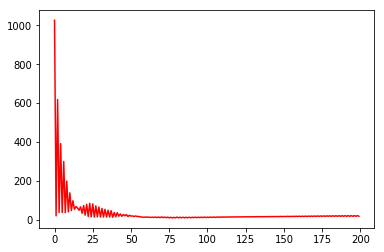

Accuracy over epochs


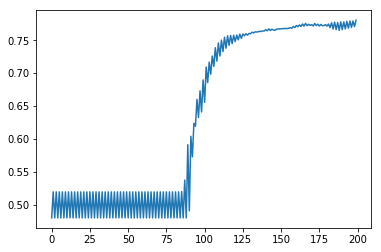

Test accuracy:  0.7815385
MSE: 16.5471


In [22]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE: %.4f" % sess.run(mse))

sess.close()

The results above show that this structure was better than the 3rd model in classifying the mushrooms.
Over the epochs, the MSE fluctuates for the first few (30) epochs after that it remains almost constant till 125th epoch and slightly increases after that.Whereas the accuracy on the training set fluctuates till 115 epochs between two values and then starts increasing and reaches to around 83% but still it is not a steady increase it increases in a fluctuating manner.

The test accuracy of this model is around **82%** and MSE of **19.32** clearly shows that this model has not over fitted the data.

# IV - Results 

** <font color="red">NOTE: The explanation for results above might change if you rerun the model and once the accuracy and MSE plots are plotted the session is closed, so please rerun if you want to check it again.</font>**

In a nut shell the first two models i.e. Contracting-Expanding and Alternating models did not perform better where as the later 2 models i.e. Contracting and Expanding models performed better with around **80+ %** accuracy.By this what i felt is that the number of nodes in hidden layers should follow a order (Decreasing/Increasing).
Though the last two models performed better than the first two, the accuracy and MSE for the last 2 models fluctuated a lot, and there was no fluctuations in the first two models.

# Conclusions

The main challenge was to figure out how to implement the DNN, after the first model was implemented it was fairly easy to implement the other 3 models(all I had to do was to change the number of nodes for each hidden layer).

# Extra Credit

- Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources. 

I have ran this python notebook in FloydHub GPU and used **%timeit** command to record the training time for each epoch.
Here is the comparison table for the average run times for single epoch. 

Processor / Model | CPU | GPU|
--|--|:--|
**Contract-Expand** | 45 ms | 3.3 ms|
**Alternating** | 55 ms|3.22 ms|
**Contracting**| 70 ms|3.81 ms|
**Expanding** | 70 ms| 3.8 ms|

Here are  the proof images for running in FloydHub (Please check the url in the image).
(Only 2 images are added here rest of the images are included in the zip file)

Time record for Contracting-Expanding model in CPU:
<img src="contracting_expanding_cpu_train.PNG" width="50%" title="Time record for Contracting-Expanding model in CPU">
Time record for Contracting-Expanding model in GPU
<img src="contracting_expanding_gpu_train.PNG" width="50%" title="Time record for Contracting-Expanding model in GPU">

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
